In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime
import math
import time

In [7]:
datas=pd.read_csv('owid-covid-data.csv')
datas

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49873,NaN,NaN,International,2020-10-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49874,NaN,NaN,International,2020-10-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49875,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49876,NaN,NaN,International,2020-10-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Selecting the position of the Nepal's data and displaying
Nepal_datas = datas.loc[datas['location']=='Nepal']
Nepal_datas

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34594,NPL,Asia,Nepal,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34595,NPL,Asia,Nepal,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34596,NPL,Asia,Nepal,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34597,NPL,Asia,Nepal,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34598,NPL,Asia,Nepal,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34877,NPL,Asia,Nepal,2020-10-09,98617.0,4364.0,2698.429,590.0,12.0,11.571,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34878,NPL,Asia,Nepal,2020-10-10,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34879,NPL,Asia,Nepal,2020-10-11,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34880,NPL,Asia,Nepal,2020-10-12,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [61]:
Y = Nepal_datas['total_deaths']  
X = Nepal_datas['total_cases'] 
X=X.fillna(0) #which solves the nan problem
Y=Y.fillna(0)

In [62]:
x = X.to_numpy() #X are in pandas series, converting to numpy array
y = Y.to_numpy()


In [63]:
x = x.reshape(-1,1) #convert to 2d array for lin.fit()
y = y.reshape(-1,1)

In [64]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

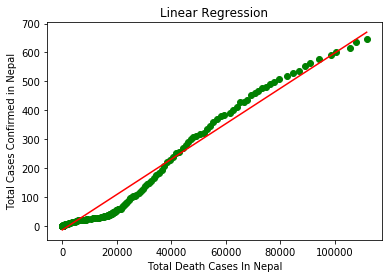

In [65]:
plt.scatter(x, y, color = 'green') #original plot

plt.plot(x, lin.predict(x), color = 'red') #predicted plot
plt.title('Linear Regression') 
plt.xlabel('Total Death Cases In Nepal') 
plt.ylabel('Total Cases Confirmed in Nepal') 

plt.show() 

In [66]:
# polynomial 
xpoly = X.to_numpy().reshape(-1,1)
ypoly = Y.to_numpy().reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(xpoly) 

poly.fit(X_poly, ypoly) 
lin2 = LinearRegression() 
lin2.fit(X_poly, ypoly) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

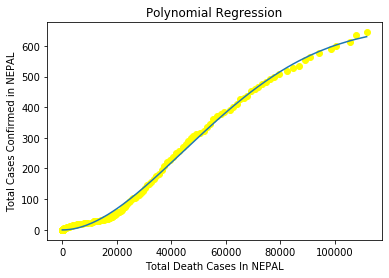

In [67]:
# Visualising the Polynomial Regression results 
plt.scatter(xpoly, ypoly, color = 'yellow') 

plt.plot(xpoly, lin2.predict(poly.fit_transform(xpoly)))
plt.title('Polynomial Regression') 
plt.xlabel('Total Death Cases In NEPAL') 
plt.ylabel('Total Cases Confirmed in NEPAL') 

plt.show() 

In [68]:
# predict some result 
lin.predict([[200000]]) 

array([[1209.57169209]])

In [71]:
# predicts accroding to degree 4 curve
lin2.predict(poly.fit_transform([[200000]]))   

array([[1358.60130067]])